In [149]:
# !pip install matplotlib

In [150]:
import pandas as pd
import math


In [151]:
# rainfall_file_path="../includes/Hydromet_Data/rainfall_low_event.csv"
# result_file_path = "../../rainfall_output/low event/results.csv" 


#calibration
rainfall_file_path="../../rainfall_output/Output 2_calibration/rainfall_sept_28.csv"
result_file_path = "../../rainfall_output/Output 2_calibration/2_results.csv" 

# rainfall_file_path="../includes/Hydromet_Data/rainfall_sept_28_0_wl_check.csv"
# result_file_path = "../results/results.csv" 


stabilization_step=7

In [152]:
# Create a pandas DataFrame


rainfall_df=pd.read_csv(rainfall_file_path)

df = pd.read_csv(result_file_path)

rmse_df = df.groupby("date_col")[["measured_water_level",'original_water_level']].mean().reset_index()

# rmse_df=rmse_df.iloc[stabilization_step:]

# Rename columns for clarity
rmse_df.columns = ["date_col", "avg_measured_water_level",'original_water_level']
rmse_df['distance_error'] = (rmse_df['original_water_level'] - rmse_df['avg_measured_water_level']) ** 2

# print(rmse_df)
total_distance_error = rmse_df['distance_error'].sum()

num_rows=df.shape[0]
total_distance_error=total_distance_error/num_rows
rmse=math.sqrt(total_distance_error)
nrmse=(rmse/rmse_df['original_water_level'].mean())*100
print("RMSE: " , rmse)
print( "Normalised RMSE: ",  nrmse)

RMSE:  0.05081296665222666
Normalised RMSE:  4.682526653445382


In [153]:
rainfall_df['DateTime'] = pd.to_datetime(rainfall_df['DateTime'])
rmse_df['date_col'] = pd.to_datetime(rmse_df['date_col'])

# Perform the merge based on the datetime columns
merged_df = pd.merge(rmse_df, rainfall_df[['DateTime', 'Hourly rainfall value dhapdam']], 
                     left_on='date_col', right_on='DateTime', how='left')

# Check the result
# print(merged_df.head())

# Optionally, drop the 'DateTime' column if it's no longer needed
merged_df.drop(columns=['DateTime'], inplace=True)



/var/folders/z7/dwc0g9dx10n413p0gzrtz1lh0000gn/T/ipykernel_65105/2001404248.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  rainfall_df['DateTime'] = pd.to_datetime(rainfall_df['DateTime'])
/var/folders/z7/dwc0g9dx10n413p0gzrtz1lh0000gn/T/ipykernel_65105/2001404248.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  rmse_df['date_col'] = pd.to_datetime(rmse_df['date_col'])


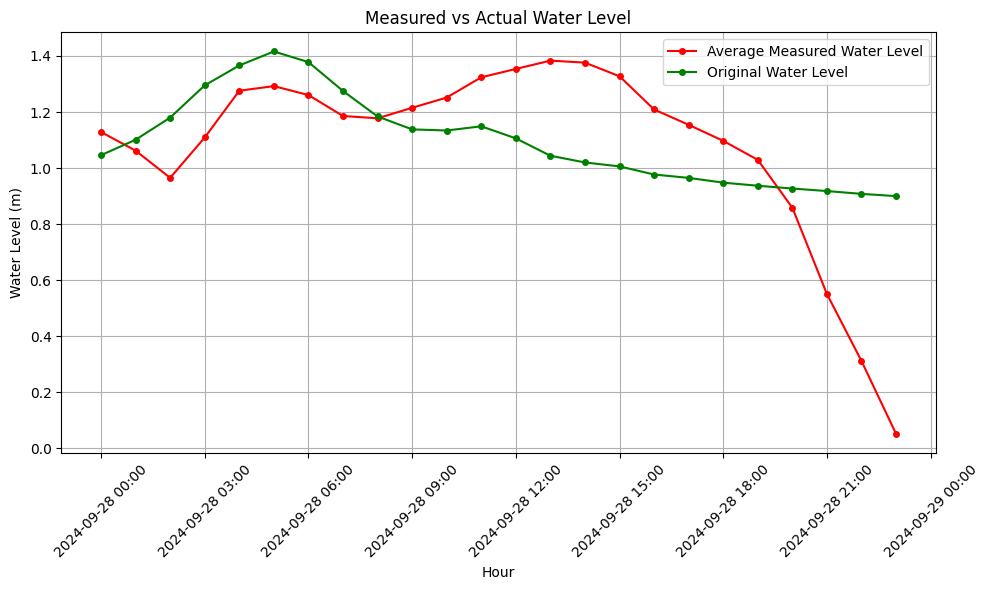

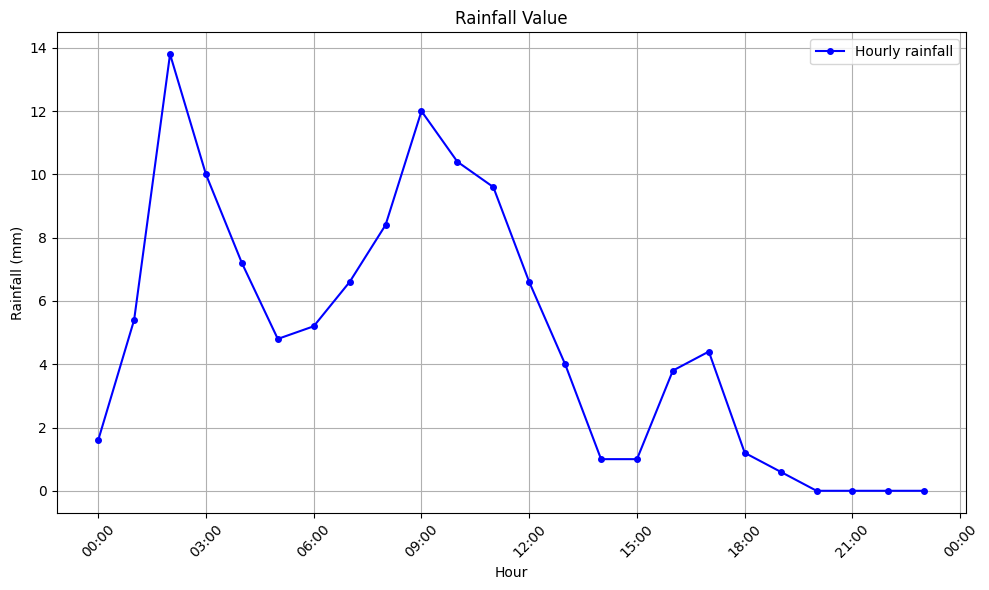

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot avg_measured_water_level
simulate_data=merged_df.iloc[stabilization_step:]
plt.plot(simulate_data['date_col'], simulate_data['avg_measured_water_level'], label= 'Average Measured Water Level', marker='o', color='r',markersize=4)
plt.plot(simulate_data['date_col'], simulate_data['original_water_level'], label='Original Water Level', color='g',marker='o',markersize=4)


# Plot avg_measured_water_level
# plt.plot(merged_df['date_col'], merged_df['avg_measured_water_level'], label='Average Measured Water Level', marker='o', color='r',markersize=4)
# Plot original_water_level
# plt.plot(merged_df['date_col'], merged_df['original_water_level'], label='Original Water Level', color='g',marker='o',markersize=4)



plt.title('Measured vs Actual Water Level')


plt.xlabel('Hour')
plt.ylabel('Water Level (m)')
plt.legend()
plt.grid(True)

# Show plot
plt.xticks(rotation=45)
# plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M'))

plt.tight_layout()
plt.show()

# Plotting rainfall
plt.figure(figsize=(10, 6))

# plt.plot(merged_df['date_col'], merged_df['Hourly rainfall value dhapdam'], label='Hourly rainfall', color='b',marker='o',markersize=4)

plt.plot(simulate_data['date_col'], simulate_data['Hourly rainfall value dhapdam'], label='Hourly rainfall', color='b',marker='o',markersize=4)

# Customize plot
plt.title('Rainfall Value')
plt.xlabel('Hour')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)

# Show plot
plt.xticks(rotation=45)
# plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.show()


In [155]:
# print(len(a))
filtered_list = [x for x in a if x != 0.0]
print(len(filtered_list))
print(min(filtered_list))
print(max(filtered_list))
filtered_list.sort()
print(filtered_list[1000:1100])

NameError: name 'a' is not defined

In [2469]:
(192869/8)/30


803.6208333333333